# Taller "_Representation Learning_: Una red, 4 casos de uso"

### NOTA: Para que funcione el codigo hay que descargar el dataset.

Para descargar el Flickr8K dataset:
[https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip](https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip).
Si ese link ya no funciona hay que seguir elp proceso y llenar el formulario [aqui](https://forms.illinois.edu/sec/1713398).

- Extraer el ZIP en el directorio `data`
- Ademas hay que descargar los "_captions_" del dataset [aqui](http://cs.stanford.edu/people/karpathy/deepimagesent/caption_datasets.zip). Extrar en `caption_datasets`.

### Imports

In [1]:
import matplotlib.pyplot as plt
import random
import json

In [2]:
%matplotlib widget

In [3]:
from scipy import ndimage
import numpy as np
from copy import deepcopy
from PIL import Image
import IPython.display
from math import floor
import string

In [4]:
import torch
import torch.nn as nn                     # neural networks
import torch.nn.functional as F           # layers, activations and more
import torch.optim as optim  
import torchvision.transforms.functional as TF

In [5]:
import torchvision
from torchvision import datasets, models, transforms

In [6]:
is_cuda = torch.cuda.is_available()
is_cuda

False

In [7]:
if(is_cuda):
    USE_GPU = True
else:
    USE_GPU = False

### Parametros

In [8]:
from classes import INCEPTION as inception
from classes import \
    ENDWORD, STARTWORD, PADWORD, HEIGHT, WIDTH, \
    INPUT_EMBEDDING, HIDDEN_SIZE, OUTPUT_EMBEDDING, \
    CAPTION_FILE, IMAGE_DIR

> Original arch:
Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.

### Cargando InceptionV3 pre-entrenada

In [9]:
inception.load_state_dict(torch.load('models/inception_epochs_40.pth'))

<All keys matched successfully>

## Clase para iterar en los datos

In [10]:
from classes import Flickr8KImageCaptionDataset

## Clase de la red

In [11]:
from classes import IC_V6

In [12]:
f = Flickr8KImageCaptionDataset()

In [13]:
net = IC_V6(f.tokens)

In [14]:
net.load_state_dict(torch.load('models/epochs_40_loss_2_841_v6.pth'))

<All keys matched successfully>

In [15]:
if(USE_GPU):
    net.cuda()
    inception.cuda()

In [16]:
net.eval()

IC_V6(
  (batchnorm): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_embedding): Embedding(8385, 300)
  (embedding_dropout): Dropout(p=0.22, inplace=False)
  (gru): GRU(300, 300, num_layers=3, dropout=0.22)
  (linear): Linear(in_features=300, out_features=300, bias=True)
  (out): Linear(in_features=300, out_features=8385, bias=True)
)

## Visualizando predicciones

> Original caption:  A black dog in front of a tree jumping towards a red Frisbee .

> Generated caption: a dog is chasing a ball


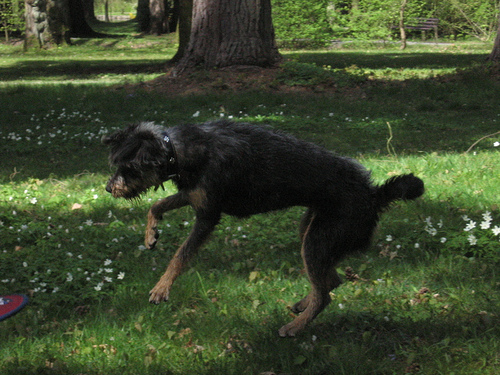

In [17]:
# In train dataset
random_train_index =  np.random.randint(len(f.training_data))
train_filename = IMAGE_DIR+f.training_data[random_train_index]['filename']
print("> Original caption: ",f.training_data[random_train_index]['sentences'][0]['raw'])
print("")
print("> Generated caption:", f.caption_image_greedy(net,train_filename))
"""
print("")
print("Beam caption:")
f.print_beam_caption(net, train_filename)
"""
IPython.display.Image(filename=train_filename) 


> Original caption:  A black dog is running across a rocky landscape .

> Generated caption: a dog is running through the snow


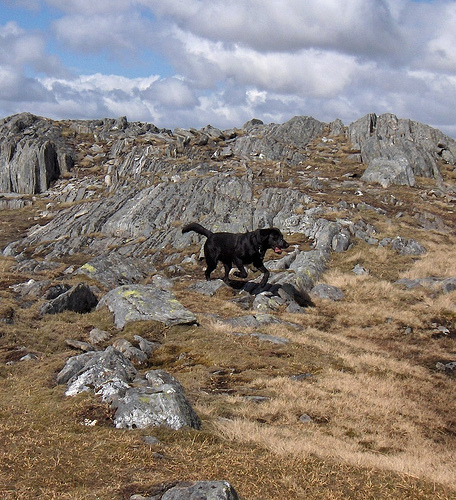

In [18]:
# In test dataset
random_test_index = np.random.randint(len(f.test_data))
test_filename = IMAGE_DIR+f.test_data[random_test_index]['filename']
print("> Original caption: ",f.test_data[random_test_index]['sentences'][0]['raw'])
print("")
print("> Generated caption:", f.caption_image_greedy(net,test_filename))
#print("")
#print("Beam caption:")
#f.print_beam_caption(net, test_filename, 10)
IPython.display.Image(filename=test_filename) 


In [19]:
train_filename = 'custom_images/kite.jpg'
print("> Generated caption:", f.caption_image_greedy(net,train_filename))
#print("")
#print("Beam caption:")
#f.print_beam_caption(net, train_filename, 3)
pil_im = Image.open(train_filename, 'r')
plt.figure()
plt.imshow(np.asarray(pil_im))
plt.show()

> Generated caption: a person is snowboarding in the air


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
import pickle

pickle.dump(f, open("pickles/flickr_data_loader.pkl", "wb"))